In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Converting input into dataset

In [3]:
from tensorflow.keras.utils import image_dataset_from_directory

# Define the path to your image dataset directory
train_dir = '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training'
test_dir  = '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test'

image_size = (100, 100)
batch_size = 64

In [6]:
model = tf.keras.Sequential([
    keras.Input(shape=(100, 100, 3)),

    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(2),
     keras.layers.Dropout(0.5),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(131,  activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 64)       0

# Training!

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale = 1./255)
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(100,100),
    batch_size = 64,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(100,100),
    batch_size = 64, 
    class_mode='categorical' 
)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
  train_generator,
  steps_per_epoch=15,  
  validation_steps=20,
  validation_data=test_generator,
  epochs=60,
  verbose=1
)

Epoch 1/60
15/15 [==============================] - 20s 1s/step - loss: 4.8650 - accuracy: 0.0167 - val_loss: 4.8436 - val_accuracy: 0.0273
Epoch 2/60
15/15 [==============================] - 17s 1s/step - loss: 4.7772 - accuracy: 0.0396 - val_loss: 4.6717 - val_accuracy: 0.0297
Epoch 3/60
15/15 [==============================] - 21s 1s/step - loss: 4.4699 - accuracy: 0.0635 - val_loss: 4.2495 - val_accuracy: 0.0844
Epoch 4/60
15/15 [==============================] - 17s 1s/step - loss: 3.9550 - accuracy: 0.1344 - val_loss: 3.7796 - val_accuracy: 0.1617
Epoch 5/60
15/15 [==============================] - 16s 1s/step - loss: 3.4280 - accuracy: 0.1948 - val_loss: 3.2306 - val_accuracy: 0.2328
Epoch 6/60
15/15 [==============================] - 21s 1s/step - loss: 2.7851 - accuracy: 0.3094 - val_loss: 2.5689 - val_accuracy: 0.3445
Epoch 7/60
15/15 [==============================] - 16s 1s/step - loss: 2.1082 - accuracy: 0.4271 - val_loss: 2.1875 - val_accuracy: 0.4406
Epoch 8/60
15/15 [==

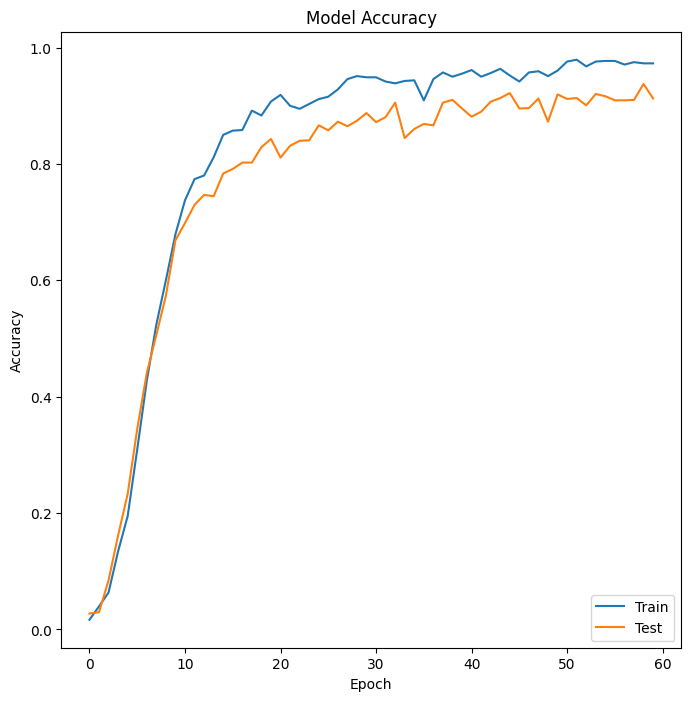

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

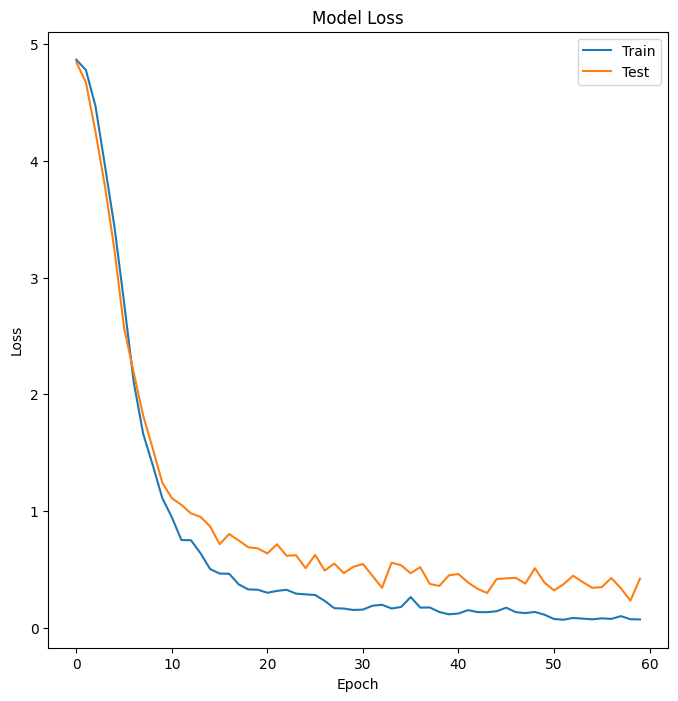

In [14]:
# Summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [15]:
loss, acc = model.evaluate(test_generator)

print('Loss:', loss)
print('Accuracy:', acc)

355/355 [==============================] - 70s 196ms/step - loss: 0.3749 - accuracy: 0.9124
Loss: 0.37492427229881287
Accuracy: 0.9124206900596619


2/2 [==============================] - 0s 85ms/step


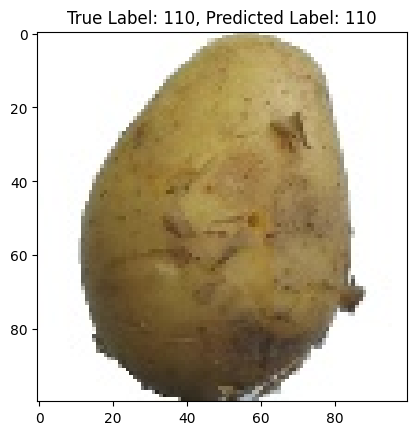

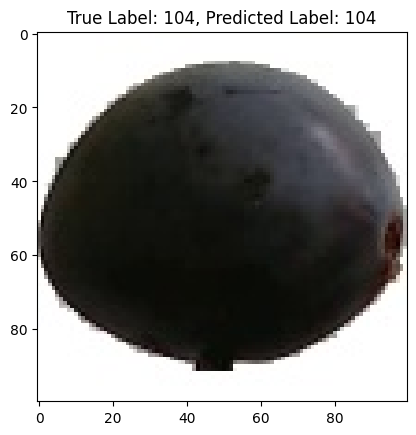

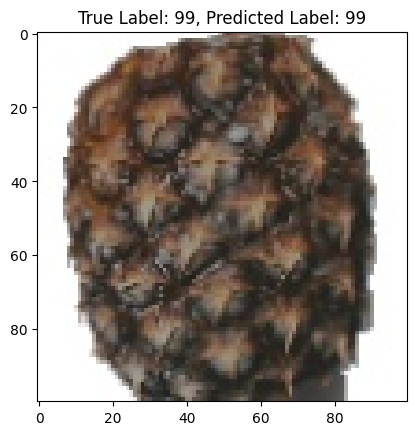

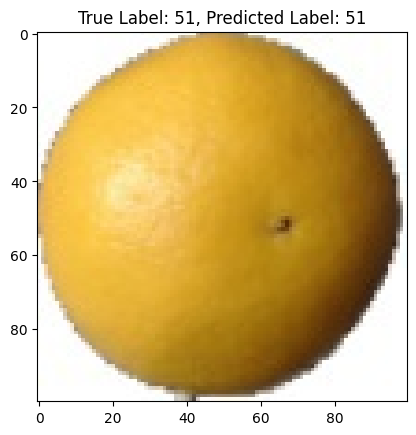

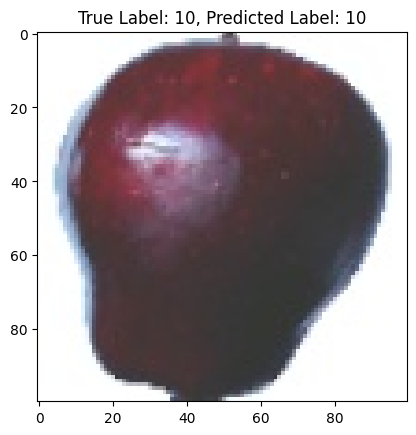

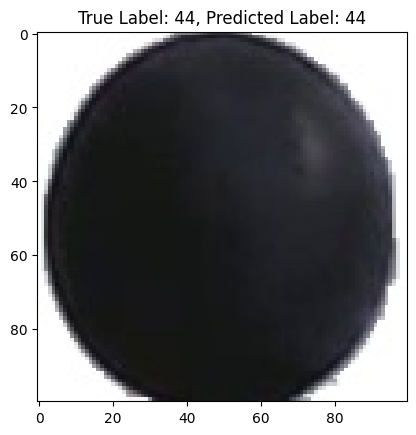

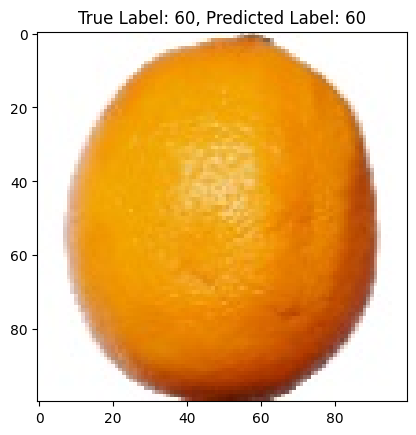

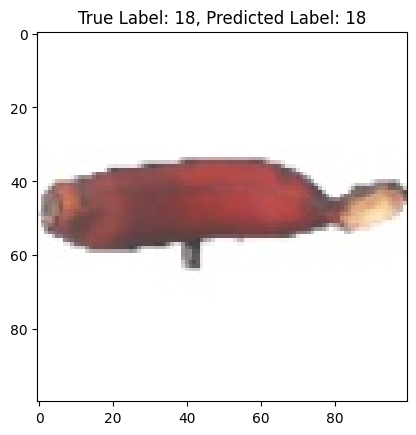

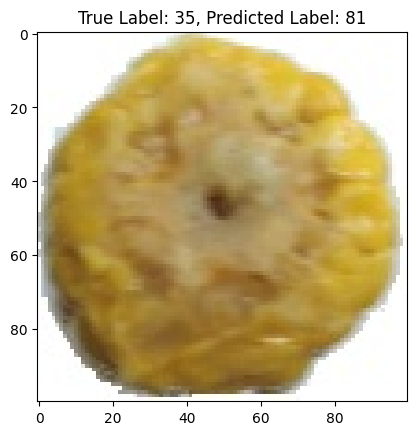

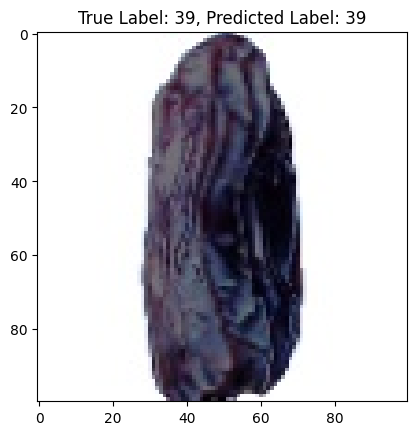

In [22]:
num_printed = 0

# Iterate through the test_generator to get a batch of data
for batch in test_generator:
    images, labels = batch  # Extract images and labels from the batch
    predictions = model.predict(images)  # Make predictions using your trained model
    
    # Iterate through the batch
    for i in range(len(images)):
        if num_printed < 10:  # Print only 10 examples
            # Display the image
            plt.imshow(images[i])
            plt.title(f"True Label: {np.argmax(labels[i])}, Predicted Label: {np.argmax(predictions[i])}")
            plt.show()
            num_printed += 1
        else:
            break  # Exit the loop after printing 10 examples
        
    if num_printed >= 10:
        break  # Exit the outer loop after printing 10 examples


